<a href="https://colab.research.google.com/github/Lukembogo-dot/Climate_Action/blob/main/Climate_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset directly from URL
url = "https://github.com/owid/co2-data/raw/master/owid-co2-data.csv"
co2_df = pd.read_csv(url)

# Show first 5 rows
print(co2_df.head())

# Show dataset info (columns, data types, missing values)
print(co2_df.info())

# Show summary statistics
print(co2_df.describe())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

       year    co2
49295  1750  9.306
49296  1751  9.407
49297  1752  9.505
49298  1753  9.610
49299  1754  9.734


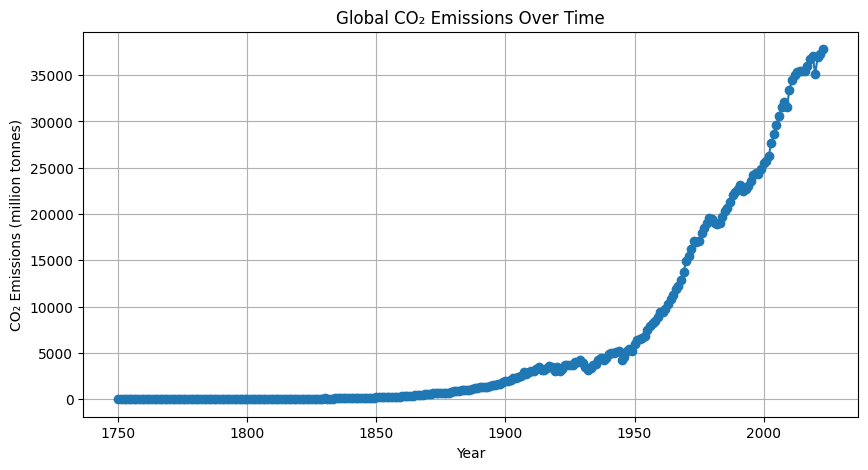

In [4]:
# Filter for 'World' only
world_df = co2_df[co2_df['country'] == 'World']

# Keep only year and co2 columns
world_df = world_df[['year', 'co2']]

# Drop any rows with missing CO2 data
world_df = world_df.dropna()

# Preview cleaned data
print(world_df.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(world_df['year'], world_df['co2'], marker='o', linestyle='-')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.grid(True)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Reshape year into 2D array for sklearn
X = world_df['year'].values.reshape(-1, 1)
y = world_df['co2'].values

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 47046766.63
R² Score: 0.65


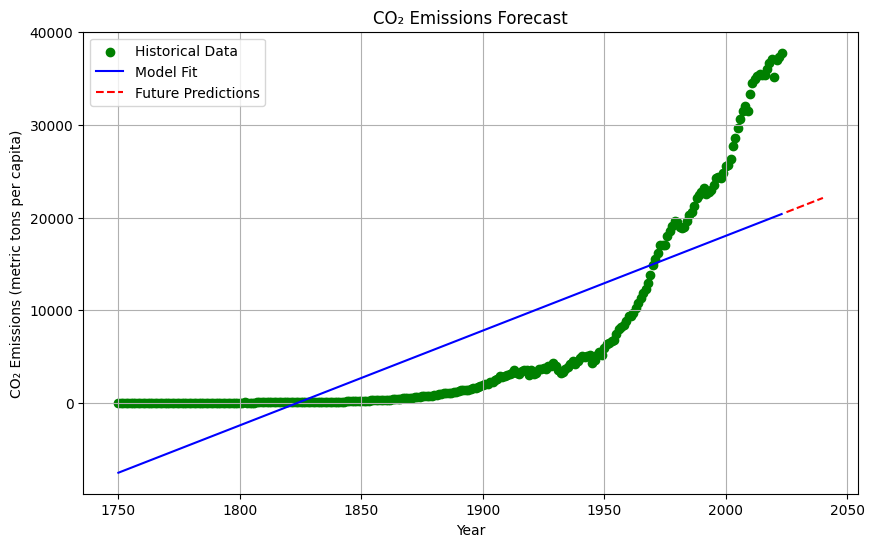

In [6]:
# Predict future emissions from 2025 to 2040
future_years = np.array(range(2025, 2041)).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plotting everything
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Historical Data')  # Actual data
plt.plot(X, model.predict(X), color='blue', label='Model Fit')  # Line of best fit
plt.plot(future_years, future_predictions, color='red', linestyle='--', label='Future Predictions')  # Forecast

plt.title('CO₂ Emissions Forecast')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (metric tons per capita)')
plt.legend()
plt.grid(True)
plt.show()